# Program Outline

## 1.Program Motivation
    Here we will be discussing the business problem and the issues associated with it. All the business requirements and how this model will benefit the stakeholders.

## 2. Data Aggregation/ Data Preparation
    In this subsection we will discuss the data sources. Some of the problems are listed below:
     1. Whether we need to aggregate data from different sources?
     2. what will be the format of our input files
     3. Clean the datasets to desired format
     4. Data Cleansing/ Data Structuring
     5. Identify the key features
     6. Data Exploration/ Plotting graphs for various attributes
     7. Removing Outliers
     
## 3. Machine Learning
    After Preparing our data, we come to the interesting part of the problem. Here we are faced with certain question like.
     1. Model Selection
     2. Training the model
     3. Evaluating the model
     4. parameter tuning
     5. Making predictions
     
## 4. Deployment
    After we have trained our model, we want to deploy our model. The objective is to make it user friendly so that this      model can reach a wider audience."Non-Tech guys"
    1. Deploying machine learning models as web services. 
    2. Deploying machine learning models for batch prediction.
    3. Deploying machine learning models on edge devices as embedded models

     
 


# 1. Program Motivation
<br>

In Greek mythology, Dionysus, son of Zeus and his mistress Semele, invented wine while living in the ancient Mount Nysa amongst nymphs.<br>

### In other words, wine can also be know as Elixir of the GODS!!

## Background Information

Therefore, its only natural that people want the best wines. There is a large demand to identify the best wines in the world so we have formulated this model to separate good wines from the bad ones. Check out this list of some of the oldest and most expensive wines in the world [expensive wines](https://www.oldest.org/food/wines/)
<br>

Now the question we must ask ourselves.... <br>

## what factors affect the quality of wine?

>- Grape variety
>- Climate weather
>- soil conditions
>- bottle ageing process

In this model, we will be using a couple of different features for our model.<br>

## Check out this beautiful picture of a vineyard

<img src="https://media.istockphoto.com/photos/vineyard-sunset-picture-id978754758?k=20&m=978754758&s=612x612&w=0&h=mIJwnwKUpxKVeY9sDvR8TxtleBmYwc_VyXhiaIdiAvs="/>






### 1.1  Importing various python libraries
  1. Pandas is a data analysis and manipulation library. We are using it to read the datasets
  2. sklearn is machine learning library of python. we need it for running the prediction model.
  3. pickle library is used for serializing a python object structure.
  4. Seaborn and matplotlib are various data visualization libraries

For future reference see: https://pandas.pydata.org/docs/user_guide/index.html 

See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for additional details on using the LogisticRegression function<br>

In [65]:
######################################
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Aggregate Data

>**Problem statements:**
>- Get data from various sources, various stake holders and aggregate it for the model
>- Identify the important features from the aggregated dataset

In this case we are reading a csv dataset and the schema will be inferred from the values.<br>
High Quality is our prediction variable.<br>
Rest of the variables are features or dependent variable.<br>

The winequality dataset is given below:

| high_quality | chlorides | total_sulfur_dioxide | density | pH   | alcohol |
|--------------|-----------|----------------------|---------|------|---------|
| 0            | 0.033     | 159                  | 0.99332 | 3.34 | 8       |
| 0            | 0.041     | 157                  | 0.99688 | 3.42 | 8       |
| 0            | 0.052     | 113                  | 0.99429 | 3.16 | 8.4     |
| 0            | 0.052     | 113                  | 0.99429 | 3.16 | 8.4     |
| 0            | 0.056     | 91                   | 0.99536 | 3.06 | 8.4     |
| 0            | 0.034     | 152                  | 0.99642 | 3.47 | 8.5     |
| 1            | 0.042     | 143                  | 1       | 3.24 | 8.5     |
<br>




In [66]:
######################################
# Importing source dataset using read_csv function from pandas
# Default delimiter will be ',' and schema will be inferred from the data since no other paramets are provided
######################################

df = pd.read_csv('winequality-white.csv')

# 2.1 DATA PREP

>**Steps taken into account:**
>- Gather data -->taken care in the previous steps
>- Check Your data --> check that if all important features are taken into account
>- format your data to make it consistent
>- Reduce the data--> keep the data you need to train your model
>- Complete Data cleaning
>- Create new features out of existing ones--> depends on business Requirement

In [67]:
print(df.dtypes)

high_quality              int64
chlorides               float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
alcohol                 float64
dtype: object


In [68]:
######################################
# Using implicit location function of the dataframe to isolate Response and Predictor variables
# first input represents all the row indexes and is represented by ':' and the second input represents the column indexes.
# 'chlorides  total_sulfur_dioxide  density    pH  alcohol' --> these are the features or independent variables
#'high_quality'--> this is the dependent variable and will be used to identify the quality of the wine
######################################
X = df.iloc[:,1:len(df.columns)]

y = df.iloc[:,0]

### 2.1.1 Explore your data. Evaluate relationships between your data
    1. Monovariate
    2. bivariate
    3. Multivariate Analysis

In [69]:
X.describe()                                                       # we are calculating all major statistics of our data

,chlorides,total_sulfur_dioxide,density,pH,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.045772,138.360657,0.994027,3.188267,10.514267
std,0.021848,42.498065,0.002991,0.151001,1.230621
min,0.009000,9.000000,0.987110,2.720000,8.000000
25%,0.036000,108.000000,0.991723,3.090000,9.500000
50%,0.043000,134.000000,0.993740,3.180000,10.400000
75%,0.050000,167.000000,0.996100,3.280000,11.400000
max,0.346000,440.000000,1.038980,3.820000,14.200000


Text(0.5, 1.0, 'Scatter plot on wine dataset')

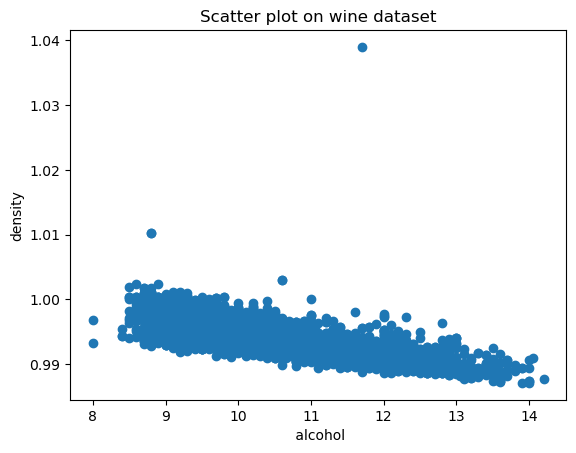

In [70]:
#multivariate analysis
#I want to look at the relationship of Alcohol vs density to compare the correlations for the two features

plt.scatter(df['alcohol'],df['density'])
plt.xlabel(' alcohol')
plt.ylabel('density')
plt.title('Scatter plot on wine dataset')

<AxesSubplot:>

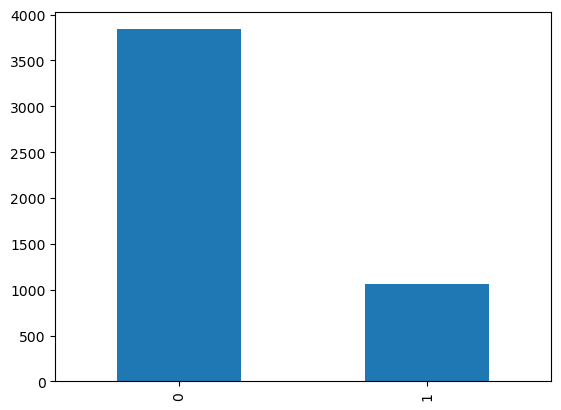

In [71]:
#plotting the fequency of our target variables

df['high_quality'].value_counts().plot(kind ='bar')

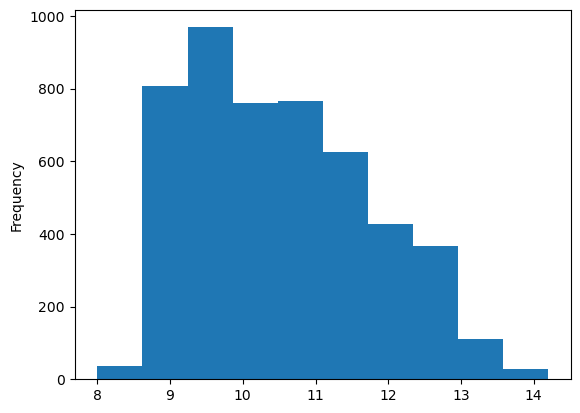

In [72]:
df.alcohol.plot(kind='hist');

# 3.Machine Learning
## 3.1 Model selection
   Model selection is the key feature for machine learning problem.A model has several limitations depending on the data distribution. Therefore any ideal model needs to be selected carefully.[model selection](https://scikit-learn.org/stable/model_selection.html)<br>
   
## 3.2 Feature Selection/ Engineering
   Selecting key features for the process or creating new features out of existing ones based on business requirement.
   

   
   
   



In [73]:
######################################
#The Block below  represents logistic regression model where max iterations are set to 800
# It is kind of a solver prediction model where probablility of variables are predicted based on classes of dependent variables
# Max iterations provide the maximum iteration that can be taken by the solver to converge
# X is the input variables and y is the prediction or output variable which has only 2 classes 0 and 1
# Model.fit generalises the data on which it was trained. It accurately approximates the output when provided with unseen inputs.
######################################
df['age-density'] = df['alcohol']/df['density']
print(df.head())
model = LogisticRegression(max_iter=800)
model.fit(X,y)




   high_quality  chlorides  total_sulfur_dioxide  density    pH  alcohol  \
0             0      0.045                 170.0   1.0010  3.00      8.8   
1             0      0.049                 132.0   0.9940  3.30      9.5   
2             0      0.050                  97.0   0.9951  3.26     10.1   
3             0      0.058                 186.0   0.9956  3.19      9.9   
4             0      0.058                 186.0   0.9956  3.19      9.9   

   age-density  
0     8.791209  
1     9.557344  
2    10.149734  
3     9.943753  
4     9.943753  


LogisticRegression(max_iter=800)

## 3.3 Model Evaluation
   Model evaluation is the process of checking the model performance to see how much our model is able to explain the data whereas model selection is the process of seeing the level of flexibility we need for describing the data.
   
## 3.4 Hyperparameter tuning
>**These hyperparameters might address model design questions such as:**

>- What degree of polynomial features should I use for my linear model?
>- What should be the maximum depth allowed for my decision tree?
>- What should be the minimum number of samples required at a leaf node in my decision tree?
>- How many trees should I include in my random forest?
>- How many neurons should I have in my neural network layer?
>- How many layers should I have in my neural network?
>- What should I set my learning rate to for gradient descent?
   

In [74]:
predictions = model.predict(X)
print(accuracy_score(y,predictions))

0.8023683135973867


In [75]:

######################################
# Using pickle we are serializing the python object and storing values 
# 1. First we are opening a file which will be named 'classifier'
# 2. Using dump we are then storing our python object 'model' to this file
# 3. we are closing the file
######################################


pickle_out = open('classifier', mode='wb')
pickle.dump(model, pickle_out)
pickle_out.close()

# 4. Deployment
   Deploying your model is the next most interesting thing. We are doing so that it can reach all the stakeholders.
Here we are using streamlit to deploy our model on the local server. [streamlit guide](https://docs.streamlit.io/)
>**Questions**
>- What can we do to make this more interactive?
>- Any limitations on the server?
>- Using variables that are easy to comprehend



   
    

In [2]:
%%writefile app.py

import pickle
import streamlit as st



pickle_in = open('classifier', 'rb')
classifier = pickle.load(pickle_in)

@st.cache()

# Define the function which will make the prediction using data
# inputs from users
def prediction(chlorides, total_sulfur_dioxide,
               density, pH, alcohol):
    
    # Make predictions
    prediction = classifier.predict(
        [[chlorides, total_sulfur_dioxide,
               density, pH, alcohol]])
    
    if prediction == 0:
        pred = 'Wine is of Bad Quality'
    else:
        pred = ' Congrats! This wine is of best Quality'
    return pred

# This is the main function in which we define our webpage
def main():
    
    # Create input fields
    chlorides = st.number_input("Number of chlorides(0-1)",
                                  min_value=0.000,
                                  max_value=1.000,
                                  value=0.01,
                                  step=0.001,
                                 )
    total_sulfur_dioxide = st.number_input("total sulfur dioxide Level (0-200)",
                              min_value=0,
                              max_value=200,
                              value=120,
                              step=10
                             )

    density = st.number_input("density Level (0-1)",
                              min_value=0.00,
                              max_value=1.00,
                              value=0.01,
                              step=0.001
                             )
    pH = st.number_input("PH Index (0-10)",
                          min_value=0.00,
                          max_value=10.00,
                          value=5.3,
                          step=0.01
                         )
    alcohol = st.number_input("alcohol in Years(max. 20)",
                          min_value=0,
                          max_value=20,
                          value=5,
                          step=1
                         )

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(chlorides, total_sulfur_dioxide,
               density, pH, alcohol)
        st.success(result)
       
if __name__=='__main__':
    main()
    

Overwriting app.py


In [ ]:
!streamlit run app.py

^C
